About this data

longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

oceanProximity: Location of the house with respect to the sea/bay area

In [1]:
# Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
# Data loading
file_path = Path("housing.csv")
cal_housing_df = pd.read_csv(file_path)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# List dataframe data types
cal_housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
cal_housing_df.duplicated().unique

<bound method Series.unique of 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool>

In [6]:
cal_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
cal_housing_df.shape

(20640, 10)

In [8]:
# Find null values
for column in cal_housing_df.columns:
    print(f"Column {column} has {cal_housing_df[column].isnull().sum()} null values")

Column longitude has 0 null values
Column latitude has 0 null values
Column housing_median_age has 0 null values
Column total_rooms has 0 null values
Column total_bedrooms has 207 null values
Column population has 0 null values
Column households has 0 null values
Column median_income has 0 null values
Column median_house_value has 0 null values
Column ocean_proximity has 0 null values


In [9]:
#dropping rows with na values
cal_housing_df = cal_housing_df[cal_housing_df['total_bedrooms'].notna()]
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
cal_housing_df = cal_housing_df.reset_index(drop=True)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data preprocessing for Logistics Regression

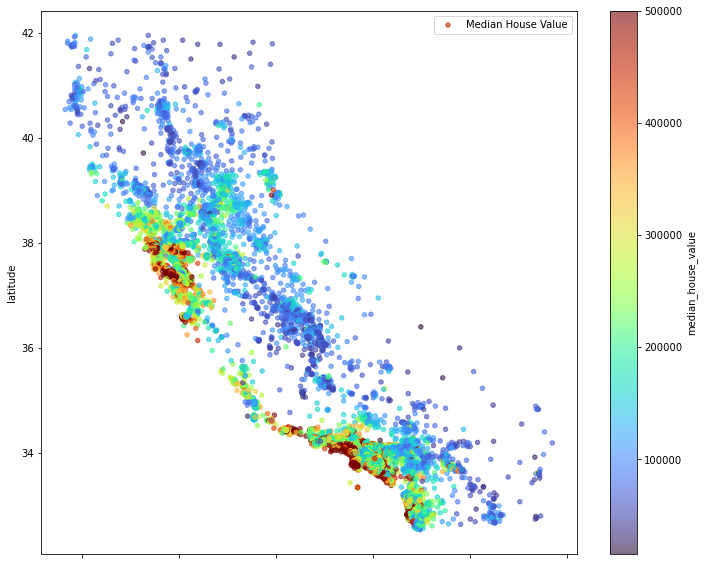

In [11]:
#Houses with high median values tend to be clustered by the shore/bay/ sea. we can perhaps do a logistic regression as well.

cal_housing_df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.6,
                    label="Median House Value",figsize=(12,10)
            ,c="median_house_value",cmap=plt.get_cmap("turbo"),colorbar=True)
plt.savefig("Images/LongitudevLatitude.png")

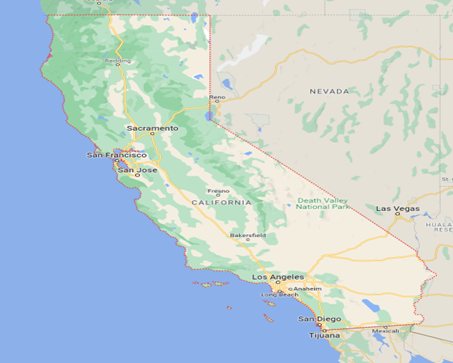

In [12]:
#Creating new columns and reengineering the dataset
cal_housing_df['rooms_per_household'] = cal_housing_df['total_rooms'] / cal_housing_df['households']
cal_housing_df['bedrooms_per_household'] = cal_housing_df['total_bedrooms'] / cal_housing_df['households']
# cal_housing_df['bedrooms_per_room'] = cal_housing_df['total_bedrooms'] / cal_housing_df['total_rooms']
cal_housing_df['population_per_household'] = cal_housing_df['population'] / cal_housing_df['households']

In [ ]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn

# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(cal_housing_df).map_upper(plt.scatter)
plt.savefig("Images/Seaborn.png")

## Significance of checking correlationship between input features.
A collinearity is a special case when two or more variables are exactly correlated.

when input features in the regression model are highly correlated to each other. It makes it hard to interpret of model and also creates an overfitting problem.

This means the regression coefficients are not uniquely determined. In turn it hurts the interpretability of the model as then the regression coefficients are not unique and have influences from other features. 
to have a more interpretable model, rule of thumb is that we should avoid features that have a very high (~R² > .8) being contained in the features.

We noticed that the following features are highly correlated with each other: 'total_bedrooms','total_rooms', 'households', 'population', 'bedrooms_per_household', and 'population_per_household' are highly correlated. 
One can assume population for each block is certainly proportional to the households numbers. In addition, total rooms can certainly be proportional to the number of bedrooms. Thus, a high correlation should be expected.

This implies a multicollinearity and takes away from our ability to interpret the beta coefficients from both.
We would need to either drop some of these variables or find a way to make them less correlated. 

In [13]:
cal_housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.013402,0.002304
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.070025,0.002522
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,-0.077918,0.013258
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,0.029373,-0.024596
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.045887,-0.028355
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,-0.066510,0.070062
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.055158,-0.027336
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,-0.062299,0.018894
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.046739,-0.023639
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,0.848616,-0.004873


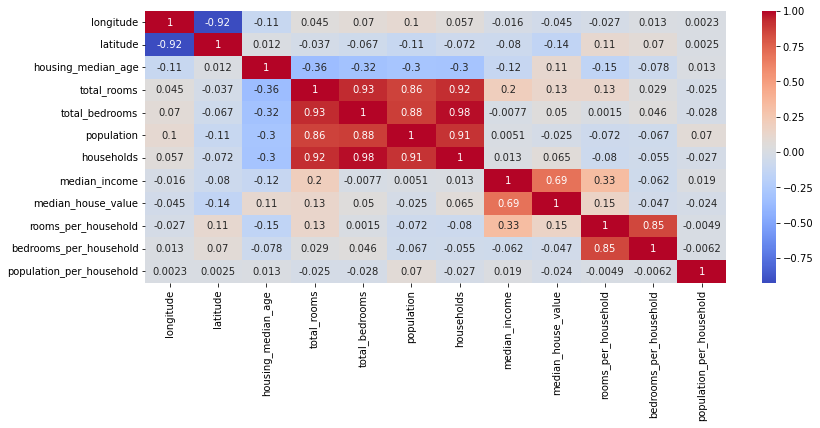

In [14]:
#Correlation matrix
# rule of thumb is that we should avoid features that have a very high (~R² > .8)
import seaborn

cal_housing_df.corr()
plt.figure(figsize=(13,5))
heat_map = seaborn.heatmap(cal_housing_df.corr(), annot=True, cmap="coolwarm")
plt.show()
# plt.savefig("Images/heatmapofcorrelation.png")

In [15]:
cal_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


C:\Users\Sung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


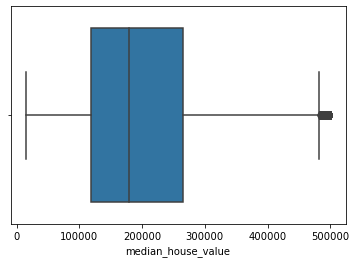

In [16]:
#please show how the house value is cut off at 500,000. perhaps the dataset was selected form a range of 0-500,000 house values.
seaborn.boxplot(cal_housing_df['median_house_value'])
plt.savefig("Images/medianhousevalue.png")

In [17]:
# confirming no null values
for column in cal_housing_df.columns:
    print(f"Column {column} has {cal_housing_df[column].isnull().sum()} null values")

Column longitude has 0 null values
Column latitude has 0 null values
Column housing_median_age has 0 null values
Column total_rooms has 0 null values
Column total_bedrooms has 0 null values
Column population has 0 null values
Column households has 0 null values
Column median_income has 0 null values
Column median_house_value has 0 null values
Column ocean_proximity has 0 null values
Column rooms_per_household has 0 null values
Column bedrooms_per_household has 0 null values
Column population_per_household has 0 null values


In [18]:
# Transform Channel
def changeMedianhousevalue(house):
    if house > 400000:
        return 0
    elif house >= 250000 and house <= 400000:
        return 1
    else:
        return 2

# encoding median house value into numbers
cal_housing_df["median_house_value"] = cal_housing_df["median_house_value"].apply(changeMedianhousevalue)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2,INLAND,5.045455,1.133333,2.560606
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2,INLAND,6.114035,1.315789,3.122807
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2,INLAND,5.205543,1.120092,2.325635
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2,INLAND,5.329513,1.171920,2.123209


In [19]:
#encoding ocean_proximity and dividing it into attributes with an object value to 0, 1 values
cal_housing_df = pd.get_dummies(cal_housing_df, prefix=None)
cal_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,6.281853,1.081081,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2,5.045455,1.133333,2.560606,0,1,0,0,0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2,6.114035,1.315789,3.122807,0,1,0,0,0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2,5.205543,1.120092,2.325635,0,1,0,0,0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2,5.329513,1.171920,2.123209,0,1,0,0,0


In [20]:
cal_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_household',
       'population_per_household', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
# List dataframe data types
cal_housing_df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value              int64
rooms_per_household           float64
bedrooms_per_household        float64
population_per_household      float64
ocean_proximity_<1H OCEAN       uint8
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

# Logistics regression

In [22]:
#Collinearity issue showcase.
# Define the X (features) and y (target) sets.
y = cal_housing_df["median_house_value"].values
X = cal_housing_df.drop(columns=['median_house_value','total_bedrooms','total_rooms', 'households'])
# X = cal_housing_df.drop(['median_house_value','total_bedrooms','total_rooms', 'households'], axis=1).values
target_names = ["Median House value greater than $400,000", "Median House value between $250,000 and $400,000", 
                "Median House value less than $250,000"]

In [23]:
X

,longitude,latitude,housing_median_age,population,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,322.0,8.3252,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,8.3014,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,7.2574,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,5.6431,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,3.8462,6.281853,1.081081,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,845.0,1.5603,5.045455,1.133333,2.560606,0,1,0,0,0
20429,-121.21,39.49,18.0,356.0,2.5568,6.114035,1.315789,3.122807,0,1,0,0,0
20430,-121.22,39.43,17.0,1007.0,1.7000,5.205543,1.120092,2.325635,0,1,0,0,0
20431,-121.32,39.43,18.0,741.0,1.8672,5.329513,1.171920,2.123209,0,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.35)

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Create a DataFrame with the transformed data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns[:13])
X_train_scaled_df

,longitude,latitude,housing_median_age,population,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.715093,-0.835104,0.269212,-0.313918,-0.741514,-0.023296,0.131367,-0.074568,1.130679,-0.685529,-0.012272,-0.355617,-0.384813
1,-0.623175,0.995886,-0.683826,-0.320050,-1.162020,-0.551639,-0.240904,-0.037642,-0.884424,1.458727,-0.012272,-0.355617,-0.384813
2,0.590255,-0.699302,0.983990,-0.517175,0.282073,0.165791,0.300200,-0.087890,1.130679,-0.685529,-0.012272,-0.355617,-0.384813
3,1.524046,-0.844470,-0.048468,1.789623,-0.676256,0.424847,0.783568,-0.042252,-0.884424,1.458727,-0.012272,-0.355617,-0.384813
4,0.879880,-0.924078,-1.080926,-0.681884,-0.712877,-0.754233,-0.115924,-0.050321,1.130679,-0.685529,-0.012272,-0.355617,-0.384813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13276,0.849919,-0.867884,0.269212,-0.437449,0.682831,-0.183530,-0.254811,0.001336,1.130679,-0.685529,-0.012272,-0.355617,-0.384813
13277,-0.423433,-0.441746,-0.207307,-0.006403,0.005869,0.317141,-0.254811,0.040882,-0.884424,-0.685529,-0.012272,-0.355617,2.598666
13278,0.565287,-0.732082,1.857609,-0.914053,1.755814,2.429289,0.341336,-0.037650,1.130679,-0.685529,-0.012272,-0.355617,-0.384813
13279,1.304330,-0.797641,0.030952,0.258182,-0.434225,-0.050136,-0.120708,-0.021394,-0.884424,1.458727,-0.012272,-0.355617,-0.384813


In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = classifier.predict(X_test)
# this one matches with the slide picture
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
cm

array([[602,  90],
       [165, 342]], dtype=int64)

In [ ]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity
# harmonic average
f1 = 2 * precision * sensitivity / (precision + sensitivity)


think about what piece is the significant piece
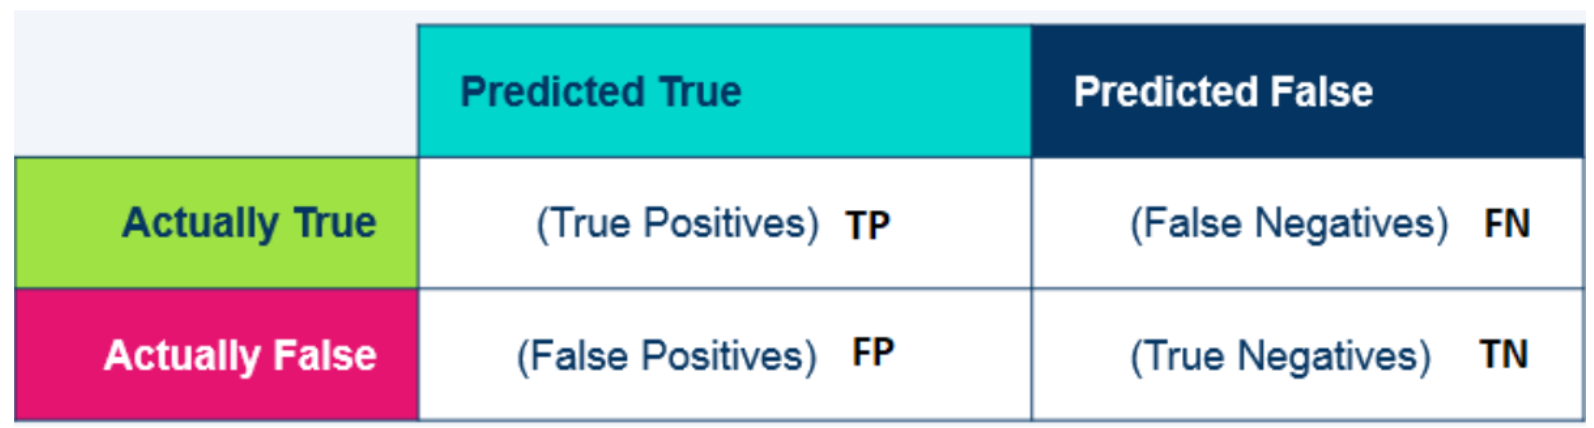

In [29]:
# Train a Logistic Regression model print the model score
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.78      0.53      0.63       650
Median House value between $250,000 and $400,000       0.60      0.44      0.51      1377
           Median House value less than $250,000       0.85      0.95      0.90      5125

                                        accuracy                           0.81      7152
                                       macro avg       0.74      0.64      0.68      7152
                                    weighted avg       0.80      0.81      0.80      7152

Training Data Score: 0.8091258188389429
Testing Data Score: 0.8145973154362416


### Out of all the predictions made True for Median house value falling in each of the price range as shown above, our model had an accuracy of 78% predicting the median house value greater than $400,000.

### 60% accuracy was seen predicting a median house value between $250,000-400,000.

### 85% accuracy was seen predicting a median house value of less than #250,000

In [30]:
# Train a Logistic Regression model print the model score. why is it giving such a low accuracy with scaled dataset?

print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.78      0.53      0.63       650
Median House value between $250,000 and $400,000       0.60      0.44      0.51      1377
           Median House value less than $250,000       0.85      0.95      0.90      5125

                                        accuracy                           0.81      7152
                                       macro avg       0.74      0.64      0.68      7152
                                    weighted avg       0.80      0.81      0.80      7152

Training Data Score: 0.4774489872750546
Testing Data Score: 0.47818791946308725


C:\Users\Sung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Sung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Random Forest Classifier

In [31]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
y_train.shape

(13281,)

In [33]:
y_test.shape

(7152,)

In [34]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.89      0.35      0.50       650
Median House value between $250,000 and $400,000       0.62      0.37      0.46      1377
           Median House value less than $250,000       0.83      0.98      0.90      5125

                                        accuracy                           0.80      7152
                                       macro avg       0.78      0.57      0.62      7152
                                    weighted avg       0.79      0.80      0.78      7152

Training Score: 0.8138694375423537
Testing Score: 0.8048098434004475


In [35]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.86      0.52      0.65       650
Median House value between $250,000 and $400,000       0.68      0.60      0.64      1377
           Median House value less than $250,000       0.90      0.97      0.93      5125

                                        accuracy                           0.86      7152
                                       macro avg       0.81      0.70      0.74      7152
                                    weighted avg       0.85      0.86      0.85      7152

Training Score: 0.9106994955199157
Testing Score: 0.8573825503355704


In [36]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.82      0.64      0.72       650
Median House value between $250,000 and $400,000       0.70      0.66      0.68      1377
           Median House value less than $250,000       0.92      0.96      0.94      5125

                                        accuracy                           0.87      7152
                                       macro avg       0.82      0.75      0.78      7152
                                    weighted avg       0.87      0.87      0.87      7152

Training Score: 1.0
Testing Score: 0.8723434004474273


In [37]:
# Fit a model, and then print a classification report. scaled dataset
clf = RandomForestClassifier(random_state=1,max_depth=5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.89      0.35      0.50       650
Median House value between $250,000 and $400,000       0.62      0.37      0.46      1377
           Median House value less than $250,000       0.83      0.98      0.90      5125

                                        accuracy                           0.80      7152
                                       macro avg       0.78      0.57      0.62      7152
                                    weighted avg       0.79      0.80      0.78      7152

Training Score: 0.7186958813342369
Testing Score: 0.716582774049217


C:\Users\Sung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sung\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
clf = ExtraTreesClassifier(random_state=1,max_depth=5).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.99      0.15      0.25       650
Median House value between $250,000 and $400,000       0.18      0.00      0.00      1377
           Median House value less than $250,000       0.73      1.00      0.84      5125

                                        accuracy                           0.73      7152
                                       macro avg       0.63      0.38      0.37      7152
                                    weighted avg       0.65      0.73      0.63      7152

Training Score: 0.7308184624651758
Testing Score: 0.7302852348993288


# Deploying PCA
To reduce the dimension of data by reducing the data into a number of independent factors primarily to remove multilinearity issues.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)


# Reducing components
pca = PCA(n_components = 0.90)

X_pca = pca.fit_transform(X_scaled)

In [43]:
# Training model
from sklearn.model_selection import train_test_split
X = df_X_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [62]:
df_X_pca = pd.DataFrame(data=X_pca)
df_X_pca.head()

,0,1,2,3,4,5
0,-0.203544,1.469485,0.222900,-0.184814,-1.199857,2.228178
1,-1.451956,1.256153,0.673643,-1.249614,-0.399270,2.062273
2,0.313679,1.559272,0.237524,0.200543,-1.294136,2.194298
3,0.522809,1.503922,0.285466,0.060826,-1.624790,1.490032
4,0.817018,1.566545,0.212155,0.212466,-1.608432,1.126988


In [63]:
sum(pca.explained_variance_ratio_)

1.0

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7965935787000783
Testing Data Score: 0.7983949892346839


In [64]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1,max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

                                                  precision    recall  f1-score   support

        Median House value greater than $400,000       0.78      0.42      0.55       462
Median House value between $250,000 and $400,000       0.61      0.48      0.54       967
           Median House value less than $250,000       0.86      0.96      0.91      3680

                                        accuracy                           0.82      5109
                                       macro avg       0.75      0.62      0.66      5109
                                    weighted avg       0.81      0.82      0.80      5109

Training Score: 0.867136517880449
Testing Score: 0.8189469563515365


## Let's deploy Bagging
### Bagging
Instead of having one decision tree, we make 50 random trees and average their output.  To get different trees, we give them different inputs by randomly sampling the input dataset. Random sampling with replacement is known as bootstrapping. (We use replacement because a data point might occur multiple times in the random sample.) This method of creating a random ensemble is known as bootstrap aggregating, or bagging.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [ ]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

## Feature Selection with Random Forests
Purpose: To find feature importance or coefficients of our model and remove the noise.

In [47]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

ValueError: Found input variables with inconsistent numbers of samples: [13281, 15324]

In [ ]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()



In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train_scaled_df.columns

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X.values), y, random_state=42)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
clf = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

In [ ]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(cal_housing_pca_df)

# Predict clusters
predictions = model.predict(cal_housing_pca_df)
predictions

# Add the predicted class column to the dataframe
cal_housing_pca_df["class"] = model.labels_

# Visualize the clusters
plt.scatter(x=new_cal_housing_df['x'], y=new_cal_housing_df['y'], c=cal_housing_pca_df['class'])
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.title('California housing clusters')
plt.show()
plt.savefig("California housing clustersk=3.png")

In [ ]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(cal_housing_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.savefig("myElbowcurve.png")

In [ ]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(cal_housing_pca_df)

# Predict clusters
predictions = model.predict(cal_housing_pca_df)
predictions

# Add the predicted class column to the dataframe
cal_housing_pca_df["class"] = model.labels_

# Visualize the clusters
plt.scatter(x=new_cal_housing_df['x'], y=new_cal_housing_df['y'], c=cal_housing_pca_df['class'])
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.title('California housing clusters')
plt.show()
plt.savefig("California housing clustersk=5.png")